#### Understand the Data


In [1]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


View the data types of each column:

In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, and Embarked are missing values.  Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that we have a general idea of the data set contents, we can dive deeper into each column.  We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

Text(0.5, 1.0, 'Age Histogram')

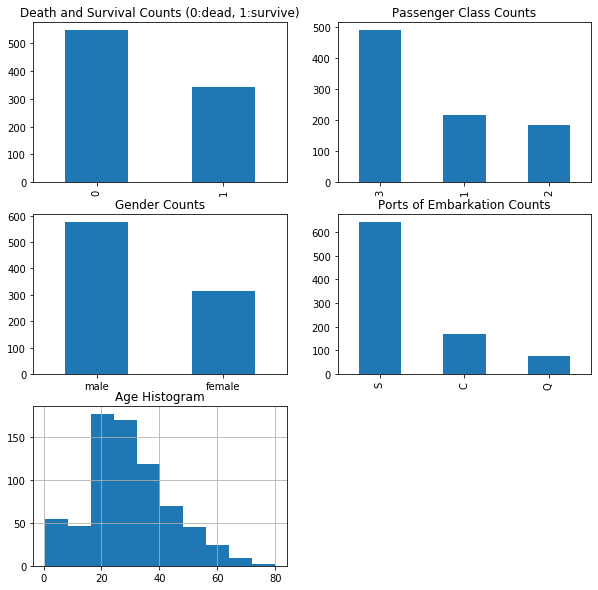

In [7]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts (0:dead, 1:survive)')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

Next we'll explore various features to view their impact on survival rates.

### Feature: Passenger Classes

In [8]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Plot the cross tab:

Text(0, 0.5, 'Survival Rate')

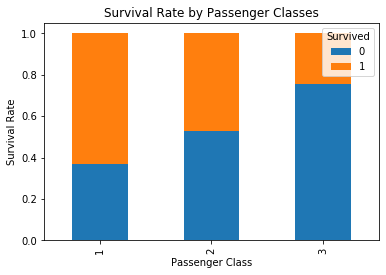

In [9]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [10]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [11]:
#Transform Sex from a string to a number representation
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Sex_Val and Survived:

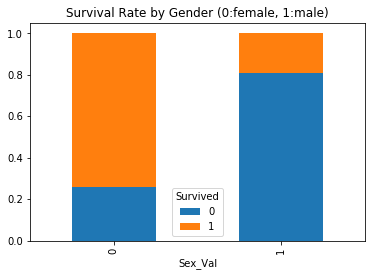

In [12]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0) #sex_val is calculated right from above
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender (0:female, 1:male)')

The majority of females survived, whereas the majority of males did not.

In [13]:
#Looking at **both Sex and Pclass.**
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('Male,   Pclass', p_class, ":",len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print('Female, Pclass', p_class, ":", len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

Male,   Pclass 1 : 122
Female, Pclass 1 : 94
Male,   Pclass 2 : 108
Female, Pclass 2 : 76
Male,   Pclass 3 : 347
Female, Pclass 3 : 144


Text(0, 0.5, 'Survival Rate')

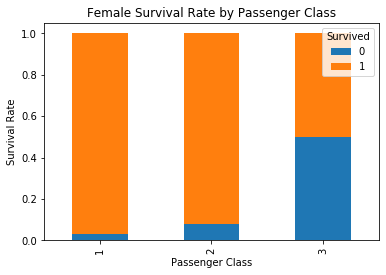

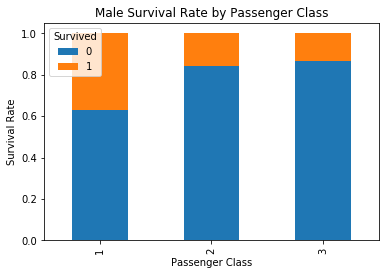

In [14]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived.  Males in First class had the highest chance for survival.

In [15]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [16]:
# Prepare to map Embarked from a string to a number representation:
# Get the unique values of Embarked

embarked_locs = (df_train['Embarked'].unique())
#embarked_locs = np.insert(embarked_locs, 0, np.nan)
embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [17]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


Plot the histogram for Embarked_Val:

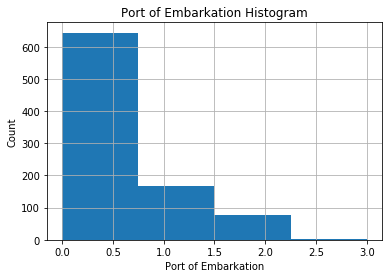

In [18]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the vast majority of passengers embarked in 'S': 0, we assign the missing values in Embarked to 'S': 

In [19]:
if len(df_train[df_train['Embarked'].isnull()]) > 0:
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

Verify we do not have any more NaNs for Embarked_Val:

In [20]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0, 0.5, 'Survival Rate')

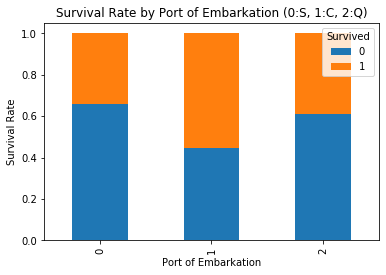

In [21]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation (0:S, 1:C, 2:Q)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 1 had the highest rate of survival. 

Leaving Embarked as integers implies ordering in the values, which does not exist.  Another way to represent Embarked without ordering is to create dummy variables (Embarked_Val_0, Embarked_Val_1, Embarked_Val_2):

In [22]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0


In [24]:

df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Sex_Val.  We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [25]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [26]:
#Ensure AgeFill does not contain any missing values:
print(len(df_train[df_train['AgeFill'].isnull()]))
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age','AgeFill']].head()

0


,Sex,Pclass,Age,AgeFill
5,male,3,NaN,25.0
17,male,2,NaN,30.0
19,female,3,NaN,21.5
26,male,3,NaN,25.0
28,female,3,NaN,21.5


Plot a normalized cross tab for AgeFill and Survived:

Text(0, 0.5, 'Count')

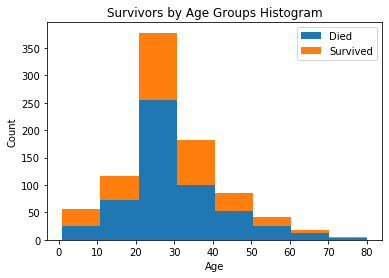

In [27]:
# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['AgeFill']
df2 = df_train[df_train['Survived'] == 1]['AgeFill']

max_age = max(df_train['AgeFill'])
plt.hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age),
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')



Unfortunately, the graphs above do not seem to clearly show any insights.  We'll keep digging further.

Plot AgeFill density by Pclass:

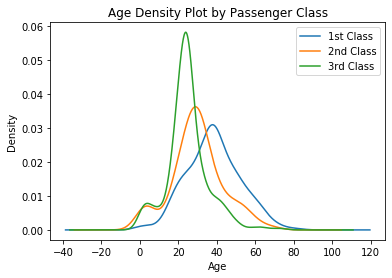

In [28]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.  We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

[0, 80.0, 0, 130]

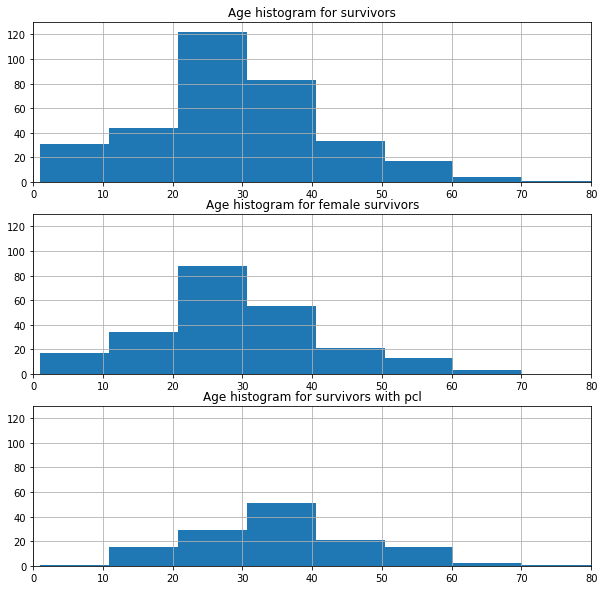

In [29]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for survivors")
plt.axis([0,max_age,0,130])

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for female survivors")
plt.axis([0,max_age,0,130])

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for survivors with pcl")
plt.axis([0,max_age,0,130])

In [30]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,35.0,0


Plot a histogram of FamilySize:

Text(0.5, 1.0, 'Family Size Histogram')

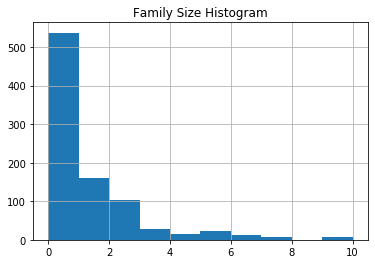

In [31]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

# Data Cleaning and Models

In [32]:

df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Drop the columns we won't use:

In [33]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Drop the following columns:
* The Age column since we will be using the AgeFill column instead.
* The SibSp and Parch columns since we will be using FamilySize instead.
* The PassengerId column since it won't be used as a feature.
* The Embarked_Val as we decided to use dummy variables instead.

In [34]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int64
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
AgeFill           float64
FamilySize          int64
dtype: object

Convert the DataFrame to a numpy array:

In [35]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  0.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  1.    , 32.    ,  0.    ]])

#### Split train and test data

In [36]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)

print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

# print (train_x)
# print (train_y)


(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


#### Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='liblinear')
clf_lr = clf_lr.fit(train_x, train_y)



Logistic regression model gives predicted probability and according to the probability, it decides the result in binary. Now, let's predict the result using train data.

In [38]:

ypred_prob = clf_lr.predict_proba(train_x)
ypred = clf_lr.predict(train_x)

print(ypred_prob)

[[0.37309189 0.62690811]
 [0.77193839 0.22806161]
 [0.78730706 0.21269294]
 ...
 [0.84605086 0.15394914]
 [0.50089714 0.49910286]
 [0.92785741 0.07214259]]


#### Logistic Regression Evaluation

In [39]:
from sklearn.metrics import confusion_matrix 

predicted_y = clf_lr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, predicted_y) 


In [40]:
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  [[95 15]
 [20 49]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  95 |  15 |
Actual   |-----|-----|
       1 |  20 |  49 |
         |-----|-----|


In [41]:
# Mean accuracy on the given data and labels

accuracy = (confusion_matrix[1,1] + confusion_matrix[0,0]) / confusion_matrix.sum()

acc_log =  clf_lr.score(test_x, test_y)

print(accuracy == acc_log)


True


In [42]:
print("Logistic Regression Model")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)


Logistic Regression Model
-------------------------
Mean accuracy with test data: 0.8044692737430168


In [43]:
from sklearn.metrics import classification_report

summary = classification_report(test_y, predicted_y, target_names=['Not Survived', 'Survived'])

In [44]:
print(summary)

              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.84       110
    Survived       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Support Vector Machine

In [78]:
from sklearn import svm

clf_svm = svm.SVC(gamma='scale', kernel='linear')
clf_svm.fit(train_x, train_y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Logistic regression model gives predicted probability and according to the probability, it decides the result in binary. Now, let's predict the result using train data.

In [79]:

ypred = clf_svm.predict(train_x)


#### SVM Evaluation 

In [80]:

predict_y = clf_svm.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)


In [81]:
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  [[92 18]
 [20 49]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  92 |  18 |
Actual   |-----|-----|
       1 |  20 |  49 |
         |-----|-----|


In [82]:
# Mean accuracy on the given data and labels

accuracy = (confusion_matrix[1,1] + confusion_matrix[0,0]) / confusion_matrix.sum()

acc_svm =  clf_svm.score(test_x, test_y)

print(accuracy == acc_svm)


True


In [83]:
print("Support Vector Machine")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)

Support Vector Machine
-------------------------
Mean accuracy with test data: 0.7877094972067039


In [84]:
from sklearn.metrics import classification_report

summary = classification_report(test_y, predict_y, target_names=['Not Survived', 'Survived'])


In [85]:
print(summary)

              precision    recall  f1-score   support

Not Survived       0.82      0.84      0.83       110
    Survived       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



### Decision Tree 

In [86]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_x, train_y)
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
Y_pred = decision_tree.predict(test_x)  

### Decision Tree Evaluation

In [88]:
predict_y = decision_tree.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)


In [89]:
# Mean accuracy on the given data and labels

accuracy = (confusion_matrix[1,1] + confusion_matrix[0,0]) / confusion_matrix.sum()

acc_decision_tree =  decision_tree.score(test_x, test_y)

print(accuracy == acc_decision_tree)


True


In [90]:
print("Support Vector Machine")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)

Support Vector Machine
-------------------------
Mean accuracy with test data: 0.8212290502793296


In [91]:
from sklearn.metrics import classification_report

summary = classification_report(test_y, predict_y, target_names=['Not Survived', 'Survived'])


In [92]:
print(summary)

              precision    recall  f1-score   support

Not Survived       0.83      0.89      0.86       110
    Survived       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
ypred = random_forest.predict(train_x)


### Random Forest Evaluation 

In [95]:
predict_y = random_forest.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)


In [96]:
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  [[100  10]
 [ 20  49]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 100 |  10 |
Actual   |-----|-----|
       1 |  20 |  49 |
         |-----|-----|


In [97]:
# Mean accuracy on the given data and labels

accuracy = (confusion_matrix[1,1] + confusion_matrix[0,0]) / confusion_matrix.sum()

acc_random_forest =  random_forest.score(test_x, test_y)

print(accuracy == acc_random_forest)


True


In [98]:
print("Support Vector Machine")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)

Support Vector Machine
-------------------------
Mean accuracy with test data: 0.8324022346368715


In [99]:
from sklearn.metrics import classification_report

summary = classification_report(test_y, predict_y, target_names=['Not Survived', 'Survived'])


In [100]:
print(summary)

              precision    recall  f1-score   support

Not Survived       0.83      0.91      0.87       110
    Survived       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



## Accuracy Comparison

In [101]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_svm, acc_decision_tree, 
              acc_random_forest,]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.832402,Random Forest
0.821229,Decision Tree
0.804469,Logistic Regression
0.787709,Support Vector Machines


# Features 

In [102]:
# We can compare feature importance for the best performing random forest, and remove some of the features to help 
# avoid overfitting. 
importances = pd.DataFrame({'feature': df_train.columns[1:],'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.280
AgeFill,0.275
Sex_Val,0.255
Pclass,0.079
FamilySize,0.075
Embarked_Val_0,0.016
Embarked_Val_1,0.012
Embarked_Val_2,0.008


[-0.86074635  0.00384697 -2.43919384  0.89365418  1.13026925  1.07005967
 -0.03505267 -0.21402784]


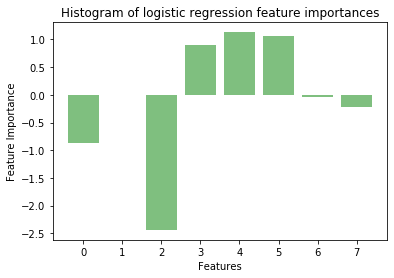

In [152]:
from matplotlib import pyplot as plt 

print(np.array(clf_lr.coef_[0])) 

bins = tuple(np.arange(len(clf_lr.coef_[0])))
y_pos = np.arange(len(bins))
feature_importance = np.array(clf_lr.coef_[0])

plt.bar(y_pos, feature_importance, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, bins)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Histogram of logistic regression feature importances')

plt.show()


[[-2.33594296e-03  6.35412455e-05 -2.00066399e+00 -4.13052789e-04
   4.42769311e-04 -2.97165210e-05 -1.82952417e-04 -2.13266498e-03]]


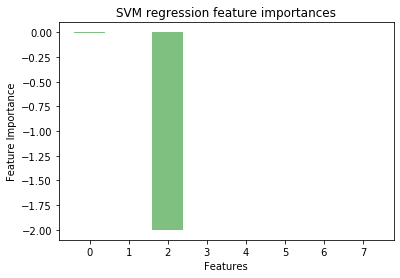

In [151]:
print(clf_svm.coef_)
bins = tuple(np.arange(len(clf_svm.coef_[0])))
y_pos = np.arange(len(bins))
feature_importance = np.array(clf_svm.coef_[0])

plt.bar(y_pos, feature_importance, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, bins)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('SVM regression feature importances')

plt.show()


[0.0897015  0.2646879  0.30866146 0.00446316 0.0059576  0.00881485
 0.23227314 0.0854404 ]


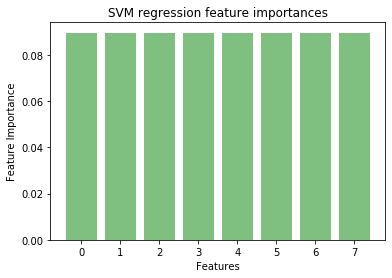

In [153]:
print(decision_tree.feature_importances_ )

bins = tuple(np.arange(len(decision_tree.feature_importances_)))
y_pos = np.arange(len(bins))
feature_importance = np.array(decision_tree.feature_importances_[0])

plt.bar(y_pos, feature_importance, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, bins)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('SVM regression feature importances')

plt.show()


[0.07904652 0.27989582 0.25524383 0.01570494 0.0117237  0.00806459
 0.27522488 0.07509571]


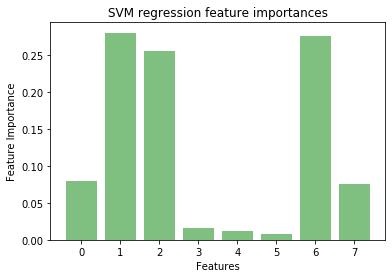

In [154]:
print(random_forest.feature_importances_ )

bins = tuple(np.arange(len(random_forest.feature_importances_ )))
y_pos = np.arange(len(bins))
feature_importance = np.array(random_forest.feature_importances_ )

plt.bar(y_pos, feature_importance, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, bins)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('SVM regression feature importances')

plt.show()